<a href="https://colab.research.google.com/github/doowilliams/sklearn-image-classifier/blob/main/scikit_learn_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Figure size 640x480 with 0 Axes>

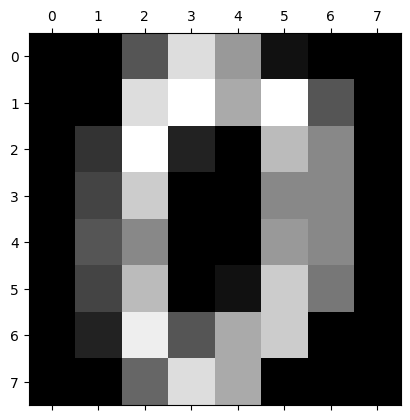

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Load the digits dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Display the first image from the dataset
plt.gray()
plt.matshow(digits.images[0])
plt.show()

<Figure size 640x480 with 0 Axes>

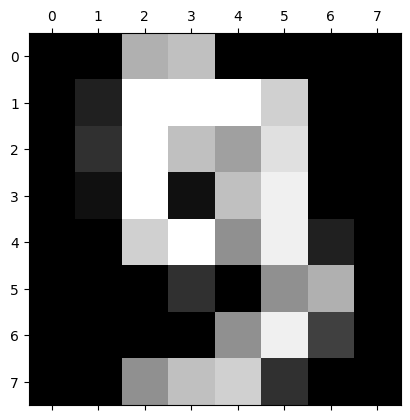

In [2]:
# Display the ten image from the dataset
plt.gray()
plt.matshow(digits.images[9])
plt.show()

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocess the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Dimensionality reduction
pca = PCA(n_components=40)  # Reduce to 40 dimensions for example
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Define the SVM model
clf = SVC(kernel='linear', random_state=42)

In [5]:
# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[53  0  0  0  0  0  0  0  0  0]
 [ 0 48  0  0  0  0  0  0  2  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 52  0  1  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  1  0 62  1  0  0  2]
 [ 1  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  2  0  0  0  1  0  0 40  0]
 [ 0  0  0  1  0  0  0  1  1 56]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       0.96      0.96      0.96        50
           2       0.98      1.00      0.99        47
           3       0.96      0.96      0.96        54
           4       1.00      1.00      1.00        60
           5       0.97      0.94      0.95        66
           6       0.98      0.98      0.98        53
           7       0.98      0.98      0.98        55
           8       0.93      0.93      0.93        43
           9       0.95      0.95      0.95        59

    accuracy                           0.97       540
   macro avg       